,test #,r-squared,kge,nse,iter of test,test #,basin code,lag,train test split,tts %,nse %,r2 %,kge %
0,0.0,0.939058,0.848346,0.953852,0.0,0.0,0.0,0.0,0.65,65.0,95.385216,93.905829,84.834562
1,1.0,0.963413,0.925370,0.968082,0.0,1.0,0.0,0.0,0.70,70.0,96.808217,96.341312,92.537041
2,2.0,0.945913,0.809408,0.933320,0.0,2.0,0.0,0.0,0.75,75.0,93.331996,94.591258,80.940778
3,3.0,0.965517,0.872881,0.968905,0.0,3.0,0.0,0.0,0.80,80.0,96.890527,96.551735,87.288126
4,4.0,0.969767,0.919083,0.974228,0.0,4.0,0.0,0.0,0.85,85.0,97.422756,96.976737,91.908300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,247.0,0.970335,0.959141,0.968071,8.0,247.0,3.0,14.0,0.75,75.0,96.807111,97.033460,95.914115
2264,248.0,0.963788,0.908394,0.970064,8.0,248.0,3.0,14.0,0.80,80.0,97.006386,96.378800,90.839365
2265,249.0,0.979743,0.982403,0.980201,8.0,249.0,3.0,14.0,0.85,85.0,98.020080,97.974265,98.240321
2266,250.0,0.961799,0.915984,0.967758,8.0,250.0,3.0,14.0,0.90,90.0,96.775831,96.179924,91.598418


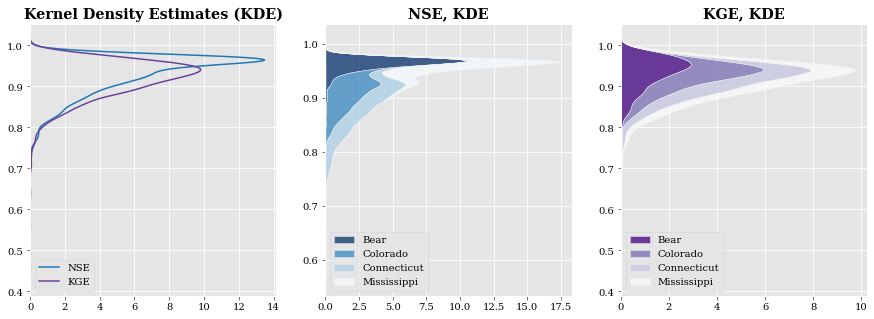

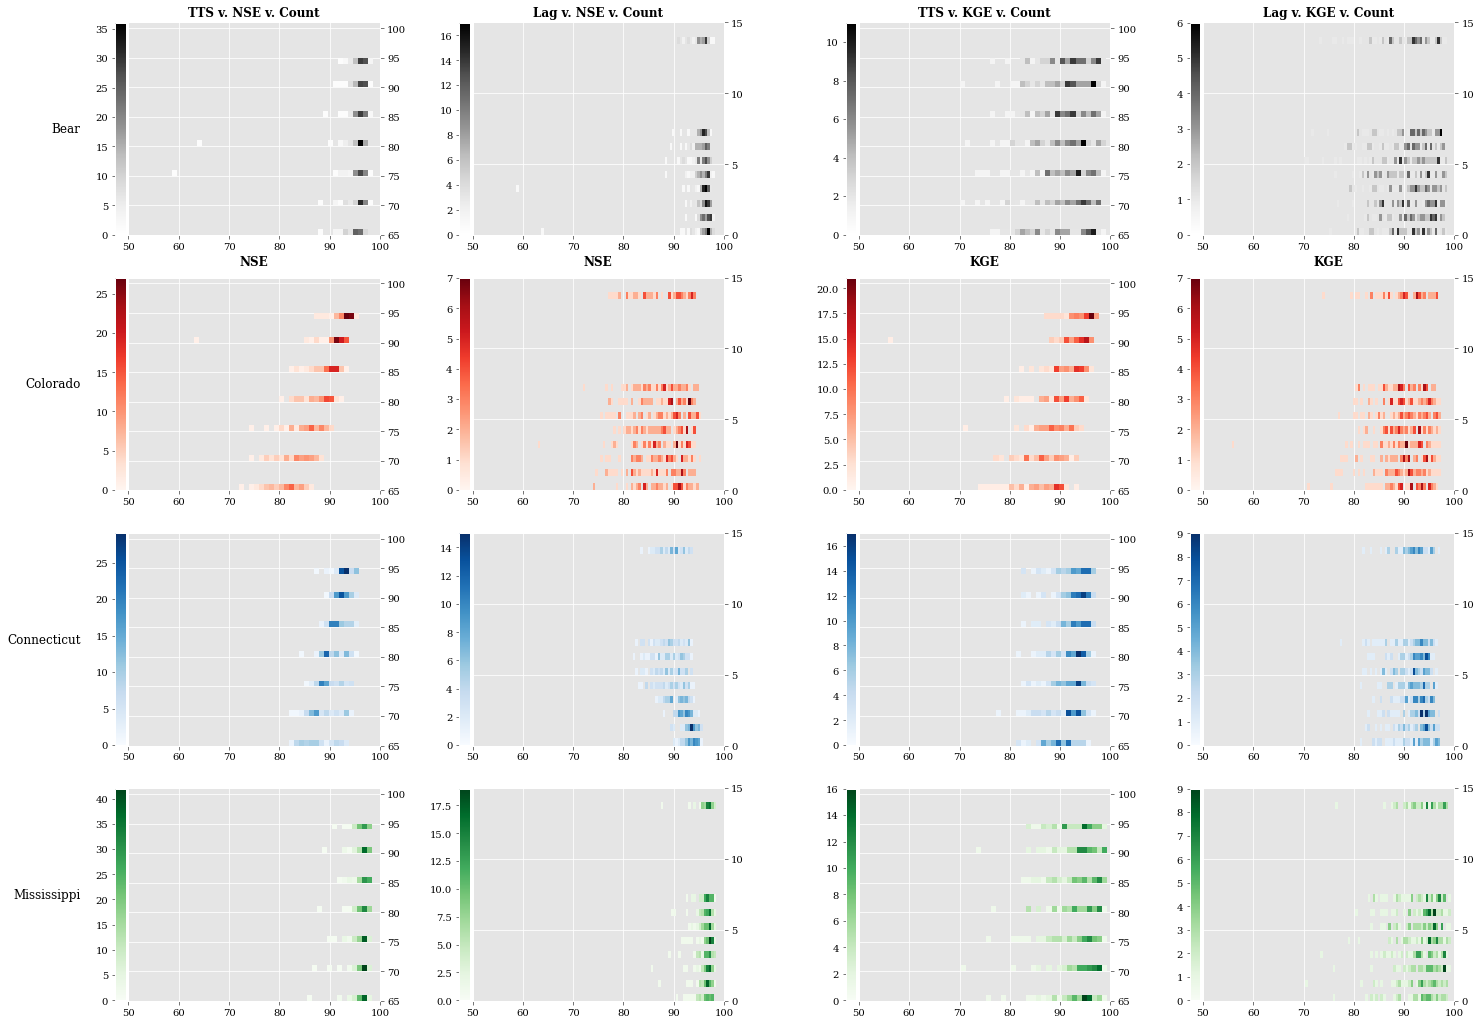

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns


plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams['font.size'] = 12
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['xtick.labelcolor'] = 'black'
plt.rcParams['ytick.labelcolor'] = 'black'
plt.rcParams['savefig.dpi'] = 200
# plt.rcParams['axes.linewidth'] = 2
# plt.rcParams['font.weight'] = "bold"
# plt.rcParams['legend.framealpha'] = 0
# plt.rcParams['grid.linestyle'] = 'dashed'
# plt.rcParams['axes.facecolor'] = 'white'
# plt.rcParams['yaxis.labellocation'] = "center"

plt.style.use('ggplot')

x = sorted(glob.glob('/work/albertl_uri_edu/fluxtoflow/files_for_paper/zultz/runrsqkgense/*.npy'))

xxxx = []
for idx,i in enumerate(x):
    h = np.load(i,allow_pickle=True)
    xxx = []
    for i in h:
        xx = []
        for jdj,j in enumerate(i):
            if (jdj == 2) | (jdj == 3):
                xx.append(j[0])
            elif (jdj == 0) | (jdj == 1):
                xx.append(j)
        xxx.append(xx)
    xxx = np.expand_dims(np.asarray(xxx),0)
    if idx == 0:
        xxxx = xxx
    else:
        xxxx = np.concatenate((xxxx,xxx))
xxxx.shape
xxxx = np.where(np.sign(xxxx) == -1, np.nan,xxxx)
        

basin_idxs = [0,1,2,3]
lags = [0,1,2,3,4,5,6,7,14]
data_split = [0.65,0.7,0.75,0.8,.85,0.9,.95]

config = []
idx = 0
for i in basin_idxs:
    for j in lags:
        for k in data_split:
            config.append((idx,i,j,k))
            idx+=1
config = np.asarray(config)
config.shape


where_to_search = 2
#0 = idx, 1 = basin #, 2 = lag, 3 = data-split

what_to_search_for = 0

metric = 1
#1 = r-squared, 2 = kge, 3 = nse

search = np.argwhere(config[:,where_to_search]==what_to_search_for)

found = xxxx[:,search,metric]

# plt.figure()
# plt.hist(found.reshape(-1),bins=50);
# plt.show()


# drilldown=0.5
# search2 = np.argwhere(xxxx[:,:,where_to_search]<drilldown)
# search2.shape
# print(search2)

# fig = plt.figure(figsize=(15,20))
# gs = gridspec.GridSpec(3,1,height_ratios=(1,1,1))
# fig.add_subplot(gs[0,0])
# sns.kdeplot(data = [xxxx[:,:,1].reshape(-1),
#                     xxxx[:,:,2].reshape(-1),
#                     xxxx[:,:,3].reshape(-1)],clip=(0.7,1),fill=True);

# plt.show()

zultz_pandas = []
for idx,i in enumerate(xxxx):
    j = np.hstack((i,np.full((xxxx.shape[1],1),idx)))
    j = np.hstack((j,config))
    if idx == 0:
        zultz_pandas = j
    else:
        zultz_pandas = np.concatenate((zultz_pandas,j),axis=0)
zultz_pandas.shape
zultz_pandas = pd.DataFrame(zultz_pandas)
zultz_pandas = zultz_pandas.rename(columns=
             {
                 0:'test #',
                 1:'r-squared',
                 2:'kge',
                 3:'nse',
                 4:'iter of test',
                 5:'test #',
                 6:'basin code',
                 7:'lag',
                 8:'train test split',
             })
zultz_pandas['tts %'] = zultz_pandas['train test split'] * 100
zultz_pandas['nse %'] = zultz_pandas['nse'] * 100
zultz_pandas['r2 %'] = zultz_pandas['r-squared'] * 100
zultz_pandas['kge %'] = zultz_pandas['kge'] * 100

display(zultz_pandas)

# display(zultz_pandas)

# plt.figure()
# sns.histplot(zultz_pandas,x='nse',y='basin code')
# plt.show()

# filt = zultz_pandas.loc[(zultz_pandas['lag'] >= 0) & (zultz_pandas['lag'] <= 7)]

# zultz_bylag = zultz_pandas.groupby(['lag']).mean()

# plt.figure()
# sns.histplot(zultz_pandas,x='nse',y='lag')
# plt.show()

# display(zultz_bylag)

# zultz_bysplit = zultz_pandas.groupby('tts %').mean()

# plt.figure()
# sns.histplot(zultz_pandas,x='nse',y='tts %',color='red')
# plt.show()
# display(zultz_bysplit)

# plt.figure()
# sns.histplot(zultz_pandas,x='nse',y='basin code',color='green')
# plt.show()

# display(zultz_pandas.groupby('basin code').mean())

fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1,3,width_ratios=(1,1,1),hspace=.2,wspace=.2)

basins = ['Bear','Colorado','Connecticut','Mississippi']
fontsize = 12



fig.add_subplot(gs[0,0])
sns.kdeplot(y=zultz_pandas['nse'],fill=False,multiple='stack',color='tab:blue')
sns.kdeplot(y=zultz_pandas['kge'],fill=False,multiple='stack',color='#6b429b',alpha=1)
# sns.kdeplot(y=zultz_pandas['r-squared'],fill=False,multiple='stack',color='green',alpha=.42)
plt.legend(['NSE','KGE','R²'],loc='lower left')
plt.title('Kernel Density Estimates (KDE)')
plt.xlabel('')
plt.ylabel('')

fig.add_subplot(gs[0,1])
sns.kdeplot(data=zultz_pandas,y='nse',hue='basin code',multiple='stack',palette='Blues')
plt.xlabel('')
plt.ylabel('')
plt.title('NSE, KDE')
plt.legend(basins,loc='lower left')

fig.add_subplot(gs[0,2])
sns.kdeplot(data=zultz_pandas,y='kge',hue='basin code',multiple='stack',palette='Purples')
plt.xlabel('')
plt.ylabel('')
plt.title('KGE, KDE')
plt.legend(basins,loc='lower left')

# fig.add_subplot(gs[1,1])
# sns.kdeplot(data=zultz_pandas,y='r-squared',hue='basin code',multiple='stack',palette='Greens')
# plt.xlabel('')
# plt.ylabel('')
# plt.title('R², KDE')
# plt.legend(basins,loc='lower left')

plt.savefig('kernel_density_estimates.png',bbox_inches='tight')


x = ['nse %','kge %']
y = ['NSE','KGE']
z = ['nse','kge']


fig = plt.figure(figsize=(24,18))
gs0 = gridspec.GridSpec(1,2,figure=fig, hspace=.01)


for xdx,i in enumerate(x):

    # fig = plt.figure(figsize=(10,15))
    gs = gridspec.GridSpecFromSubplotSpec(4,2,width_ratios=(1,1),height_ratios=(1,1,1,1),hspace=.2,wspace=.3,subplot_spec=gs0[xdx])

    basins = ['Bear','Colorado','Connecticut','Mississippi']
    colors = ['Greys','Reds','Blues','Greens']

    for idx,i in enumerate(basins):
        filt = zultz_pandas.loc[(zultz_pandas['basin code'] == idx)]
        ax = fig.add_subplot(gs[idx,0])
        # ax.set_facecolor("red")
        ax.yaxis.set_label_position("right")
        # plt.title(basins[idx],fontweight='bold',fontsize=14,color='black')
        hey = sns.histplot(filt,x=x[xdx],y='tts %',bins=50,binwidth=1,cmap=colors[idx],cbar=True,cbar_kws=dict(location='left',pad=.01,fraction=.04))
        plt.xlim((50,100))
        plt.ylim((65,101))
        plt.xlabel('')
        plt.ylabel('')
        if xdx == 0:
            ax.text(-.19,.5,basins[idx], fontsize=12,fontstyle='normal',horizontalalignment='right',verticalalignment='center', transform=ax.transAxes)
        plt.tick_params(axis='y',labelleft=False,labelright=True,left=False,right=True)
        if (idx == 0):
            plt.title(f'TTS v. {y[xdx]} v. Count',fontweight='heavy',fontsize=12)
            cbar = hey.collections[0].colorbar
            plt.xlabel(y[xdx],fontweight='bold',fontsize=12,color='black')

        else:
            plt.title('')

        ax2 = fig.add_subplot(gs[idx,1])
        plt.xlim((50,100))
        plt.ylim((0,14))
        hey2 = sns.histplot(filt,x=x[xdx],y='lag',bins=40,binwidth=.5,cmap=colors[idx],cbar=True,cbar_kws=dict(location='left',pad=.01,fraction=.04))
        plt.xlabel('')
        plt.ylabel('')
        plt.yticks([0,5,10,15])
        plt.tick_params(axis='y',labelleft=False,labelright=True,left=False,right=True)
        if idx == 0:
            plt.title(f'Lag v. {y[xdx]} v. Count',fontweight='bold',fontsize=12)
            cbar = hey2.collections[0].colorbar
            plt.xlabel(y[xdx],fontweight='bold',fontsize=12,color='black')
        else:
            plt.title('')

plt.savefig(f'3D_nsekge.png',bbox_inches='tight')

In [13]:
display(zultz_pandas)

f1 = zultz_pandas['kge'].mean()
f2 = zultz_pandas['kge'].std()
f3 = zultz_pandas['nse'].mean()
f4 = zultz_pandas['nse'].std()
f5 = zultz_pandas['r-squared'].mean()
f6 = zultz_pandas['r-squared'].std()

print(f"{f1}\n{f2}\n{f3}\n{f4}\n{f5}\n{f6}")

,test #,r-squared,kge,nse,iter of test,test #,basin code,lag,train test split,tts %,nse %,r2 %,kge %
0,0.0,0.939058,0.848346,0.953852,0.0,0.0,0.0,0.0,0.65,65.0,95.385216,93.905829,84.834562
1,1.0,0.963413,0.925370,0.968082,0.0,1.0,0.0,0.0,0.70,70.0,96.808217,96.341312,92.537041
2,2.0,0.945913,0.809408,0.933320,0.0,2.0,0.0,0.0,0.75,75.0,93.331996,94.591258,80.940778
3,3.0,0.965517,0.872881,0.968905,0.0,3.0,0.0,0.0,0.80,80.0,96.890527,96.551735,87.288126
4,4.0,0.969767,0.919083,0.974228,0.0,4.0,0.0,0.0,0.85,85.0,97.422756,96.976737,91.908300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,247.0,0.970335,0.959141,0.968071,8.0,247.0,3.0,14.0,0.75,75.0,96.807111,97.033460,95.914115
2264,248.0,0.963788,0.908394,0.970064,8.0,248.0,3.0,14.0,0.80,80.0,97.006386,96.378800,90.839365
2265,249.0,0.979743,0.982403,0.980201,8.0,249.0,3.0,14.0,0.85,85.0,98.020080,97.974265,98.240321
2266,250.0,0.961799,0.915984,0.967758,8.0,250.0,3.0,14.0,0.90,90.0,96.775831,96.179924,91.598418


0.9130689645651254
0.048706341370414595
0.9251983538998175
0.04877202838846596
0.9157502183738447
0.06070640122705463


In [59]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#E5E5E5',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'both',
          'axes.grid

In [27]:
from IPython.display import display
display(df)

NameError: name 'df' is not defined

In [134]:
hist, edges = np.histogram(zultz_pandas['nse'],bins=np.linspace(.6,1,150))
hist = np.tile(hist,(13,1))
hist = np.rot90(hist)

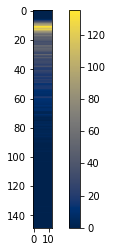

In [147]:
plt.imshow(hist,aspect='equal',cmap='cividis')
plt.colorbar()

In [22]:
timez = []
import numpy as np
with open('../run.out','r') as f:
    for idx, i in enumerate(f):
        if idx % 2 != 0:
            time = np.asarray(i.rstrip().split(' ')[1])
            print(idx, time)
            timez.append(time)
timez = np.asarray(np.float32(timez))
timez.shape
print(f"sum of timez: {np.around(np.sum(timez))} minutes")
print(f"sum of timez: {np.around(np.sum(timez/60),4)} hours")

1 521.63
3 566.935
5 599.04
7 568.295
9 536.337
11 534.665
13 566.3
15 536.427
17 524.278
sum of timez: 4954.0 minutes
sum of timez: 82.56510162353516 hours


In [11]:
import os
import glob

y = ['runpng/*/*','runtxt/*/*']

for j in y:
    x = glob.glob(j)
    file_size = sum([os.path.getsize(i)/1000000 for i in x])
    print(f"total size of all files in {j} in megabytes: {file_size}")

total size of all files in runpng/*/* in megabytes: 522.816849999999
total size of all files in runtxt/*/* in megabytes: 2.0952379999999975


210025